<div style="width:image width px; font-size:%; text-align:right;">
    <img src="img/karsten-wurth-0w-uTa0Xz7w-unsplash.jpg" width="1000" height="25" style="padding-bottom:0.2em;" />
    <figcaption>Photo by ev on Unsplash</figcaption>
</div>

# Renewable energy in the European Union

## Table of contents

## Introduction

## Objectives


# Libraries and settings

Loading the necessary libraries.

In [1]:
# Array operations and useful analysis functionalities
import numpy as np
import pandas as pd

# Seaborn library for visualisations in the notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data allocation and preparation

The Excel files are read with pandas.

In [2]:
df = pd.read_excel('data/countrydatasheets_march_2020.xlsx', # file name
                   'EU28',                                   # index of sheet in file
                   header=7,                                 # row index of column names
                   usecols='C:AF')                           # 

In [3]:
df.rename(columns={'Unnamed: 2':'Year'}, inplace=True) 

In [4]:
# Transforming the data frame
df = df.T
df = df.reset_index(level=0)
df.columns = df.iloc[0] # header 
df = df.drop(df.index[0])
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df = df.dropna(axis='columns')
df.head()


,Year,Production,Solid fossil fuels,of which hard coal,of which brown coal,Peat and peat products,Oil shale and oil sands,Oil and petroleum products,of which crude oil,Natural gas,...,Indirect CO2,International aviation,International maritime transport,GHG national total emissions / index 1990,Total GHG per capita - t CO2 eq./cap,GHG Intensity of fuel commbustion - kg CO2 eq./toe,Total GHG - GDP Intensity - ton CO2 eq./M€'10,Total Population [thousands of people],GDP2010 [Mrd EUR at 2010 exchange rates],GDP-market prices [Mrd EUR at current prices]
0,1990,950.12,360.37,220.35,140.02,3.75,4.83,136.02,133.48,163.99,...,4.22,69.14,110.72,1,12.04,2607.73,637.56,475188,8976.3,6094.34
1,1991,942.15,335.97,211.49,124.48,2.75,4.22,134.74,132.1,174.11,...,4,68.04,109.11,0.9833,11.8,2586.62,620.05,476842,9075.24,6380.34
2,1992,929.9,316.47,201.83,114.64,3.31,4.05,137.95,135.38,173.12,...,3.8,73.59,110.81,0.9536,11.42,2564.85,596.29,477925,9152.03,6623.86
3,1993,934.05,291.48,181.23,110.25,2.66,3.21,144.13,141.62,184.09,...,3.71,77.67,111.56,0.9371,11.18,2515.48,586.99,479562,9136.34,6735.58
4,1994,949.92,269.88,166,103.88,3.83,3.12,180.87,178.46,183.33,...,3.61,81.15,111.33,0.9331,11.1,2487.95,568.4,480893,9394.88,7064.21


In [5]:
# New data frame for energy balance

energy_production= df.iloc[:,0:20]
energy_production.dtypes

0
Year                          object
Production                    object
Solid fossil fuels            object
of which hard coal            object
of which brown coal           object
Peat and peat products        object
Oil shale and oil sands       object
Oil and petroleum products    object
of which crude oil            object
Natural gas                   object
Nuclear                       object
Renewables and biofuels       object
Hydro                         object
Wind                          object
Solar photovoltaic            object
Solar thermal                 object
Solid biofuels                object
Biogases                      object
Liquid biofuels               object
Wastes, Non-Renewable         object
dtype: object

In [6]:
# Einige Tabellen als Int speichern --> Dictionary
energy_production=energy_production.astype('float64')
energy_production=energy_production.astype({'Year': 'int64'})
energy_production.dtypes

0
Year                            int64
Production                    float64
Solid fossil fuels            float64
of which hard coal            float64
of which brown coal           float64
Peat and peat products        float64
Oil shale and oil sands       float64
Oil and petroleum products    float64
of which crude oil            float64
Natural gas                   float64
Nuclear                       float64
Renewables and biofuels       float64
Hydro                         float64
Wind                          float64
Solar photovoltaic            float64
Solar thermal                 float64
Solid biofuels                float64
Biogases                      float64
Liquid biofuels               float64
Wastes, Non-Renewable         float64
dtype: object

In [7]:
energy_production

,Year,Production,Solid fossil fuels,of which hard coal,of which brown coal,Peat and peat products,Oil shale and oil sands,Oil and petroleum products,of which crude oil,Natural gas,Nuclear,Renewables and biofuels,Hydro,Wind,Solar photovoltaic,Solar thermal,Solid biofuels,Biogases,Liquid biofuels,"Wastes, Non-Renewable"
0,1990,950.12,360.37,220.35,140.02,3.75,4.83,136.02,133.48,163.99,205.54,71.83,24.94,0.07,0.00,0.16,40.62,0.67,0.01,3.78
1,1991,942.15,335.97,211.49,124.48,2.75,4.22,134.74,132.10,174.11,211.66,74.72,25.93,0.09,0.00,0.18,42.37,0.72,0.01,3.98
2,1992,929.90,316.47,201.83,114.64,3.31,4.05,137.95,135.38,173.12,213.66,76.88,27.05,0.13,0.00,0.20,42.89,0.84,0.02,4.45
3,1993,934.05,291.48,181.23,110.25,2.66,3.21,144.13,141.62,184.09,222.65,81.39,27.66,0.20,0.00,0.21,46.30,0.94,0.05,4.45
4,1994,949.92,269.88,166.00,103.88,3.83,3.12,180.87,178.46,183.33,221.75,82.25,28.61,0.30,0.00,0.23,46.05,1.02,0.13,4.89
5,1995,965.29,272.67,171.83,100.84,4.18,2.92,177.01,174.59,190.99,227.48,84.37,28.53,0.35,0.00,0.28,47.63,1.14,0.22,5.66
6,1996,993.60,264.99,164.86,100.13,3.93,3.20,176.38,174.00,211.93,239.16,88.28,28.54,0.42,0.00,0.31,50.70,1.28,0.31,5.74
7,1997,985.25,260.59,163.93,96.66,3.85,3.12,174.88,172.14,202.98,242.17,91.73,29.03,0.63,0.01,0.36,52.79,1.48,0.40,5.92
8,1998,957.77,232.36,140.91,91.45,1.52,2.69,178.96,176.05,201.21,240.88,94.31,30.04,0.97,0.01,0.39,53.39,1.60,0.38,5.83
9,1999,958.54,219.32,132.75,86.57,3.53,2.34,184.94,181.83,204.31,243.59,94.76,29.91,1.22,0.01,0.43,52.92,1.78,0.44,5.75


In [8]:
energy_production['Oil']= energy_production['Oil shale and oil sands']+ energy_production['Oil and petroleum products']
energy_production=energy_production.drop(['of which hard coal',
                                          'of which brown coal',
                                          'Oil shale and oil sands',
                                          'Oil and petroleum products',
                                          'of which crude oil',
                                          'Hydro','Wind', 'Solar photovoltaic',
                                         'Solar thermal', 'Solid biofuels', 'Biogases','Liquid biofuels'],axis=1)

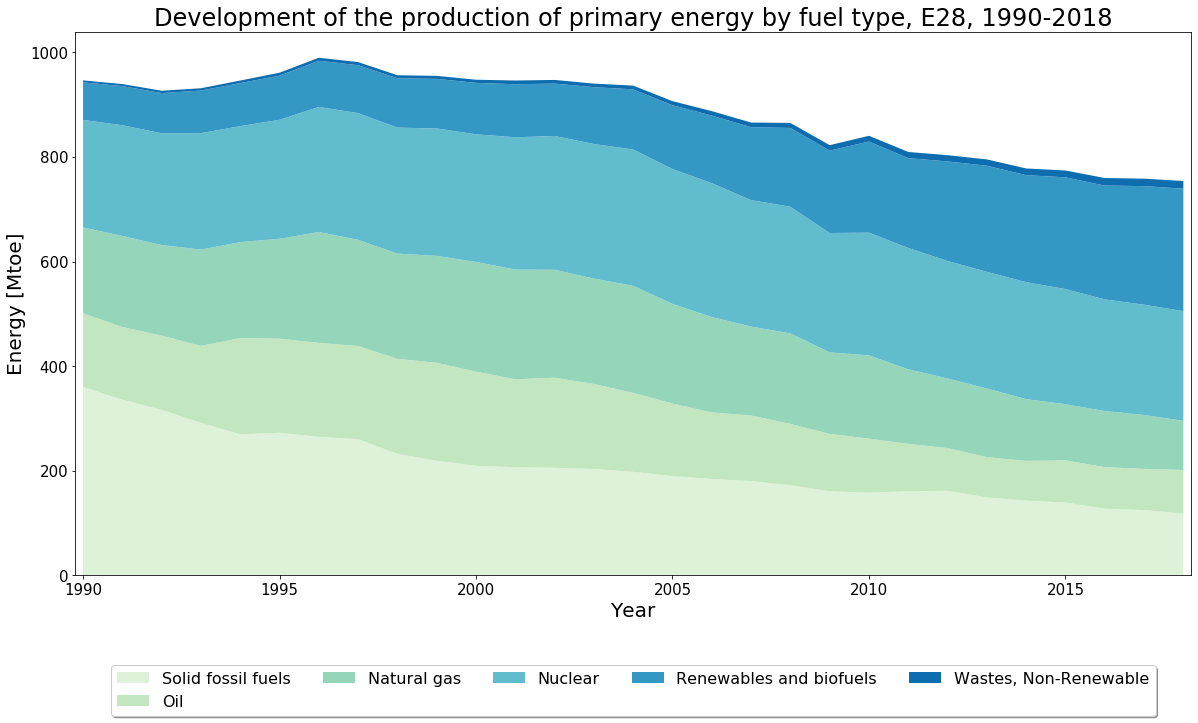

In [9]:
# Save a palette to a variable:
palette = sns.color_palette("GnBu")


x = energy_production['Year']
#y1 = energy_production['Production']
y2 = energy_production['Solid fossil fuels']
y3 = energy_production['Oil']
y4 = energy_production['Natural gas']
y5 = energy_production['Nuclear']
y6 = energy_production['Renewables and biofuels']
y7 = energy_production['Wastes, Non-Renewable']


y = np.vstack([y2, y3,y4,y5,y6,y7])

labels = [ 'Solid fossil fuels', 'Oil','Natural gas', 'Nuclear','Renewables and biofuels', 'Wastes, Non-Renewable' ]

fig, ax = plt.subplots(figsize=(20,10))

plt.ylabel('Energy [Mtoe]',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Development of the production of primary energy by fuel type, E28, 1990-2018',fontsize=24)
plt.xlim(1989.8, 2018.2)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.stackplot(x, y, labels=labels, colors=palette)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, fontsize=16)
plt.show()


